Consensus Timeのプロット（単体）

1.9145239206534423


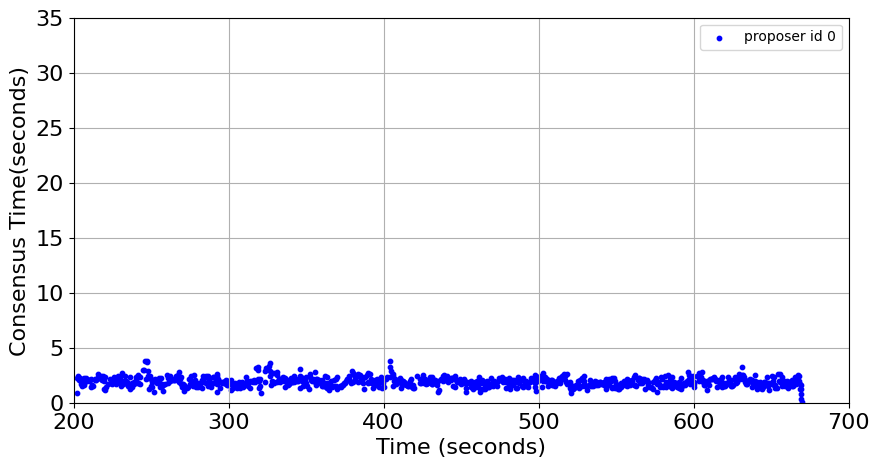

In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from statistics import mean


def get_consensus_time(input_folder_path):

    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    result = []
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)
    
    return simulation_time_list, simulation_consensus_time_list



# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 128
network_delay = 0
proposer_id_list = [1]

start_time_2lists = []
consensus_time_2lists = []


for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_congestion_fixed_vehicle_num/fixed_v20/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    print(mean(consensus_time_list))
    start_time_2lists.append(start_time_list)
    consensus_time_2lists.append(consensus_time_list)

# 3つwo1つのgraphにまとめる
plt.figure(figsize=(10, 5))
plt.scatter(start_time_2lists[0], consensus_time_2lists[0], c='blue', marker='o', s=10, label='proposer id 0')
# plt.scatter(start_time_2lists[1], consensus_time_2lists[1], c='green', marker='o', s=10, label='proposer id 1')
# plt.scatter(start_time_2lists[2], consensus_time_2lists[2], c='red', marker='o', s=10, label='proposer id 2')
plt.xlabel('Time (seconds)', fontsize=16)
plt.ylabel('Consensus Time(seconds)', fontsize=16)

plt.ylim(0, 35)
plt.xlim(200, 700)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)
plt.legend()
plt.show()






2.7378240223463686
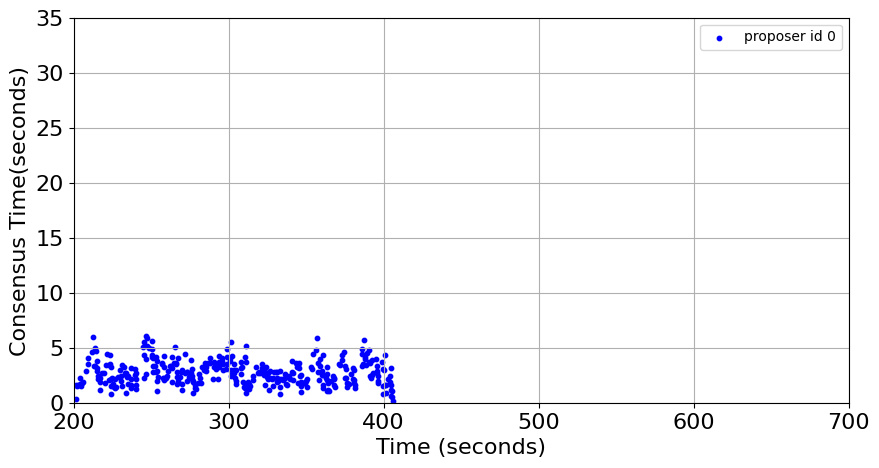

Consensus Timeのプロット（複数）

[[0.3046902654867257, 0.6843076923076923, 1.197556974459725, 2.070084686774942, 2.8590223752151465], [0.3404774774774775, 0.5982891566265061, 1.3145917338709678, 1.9755384615384615, 2.754147485080989], [0.2917572815533981, 0.556855421686747, 1.2199019607843138, 1.9145239206534423, 2.5053628762541806], [0.22435398230088496, 0.4082762645914397, 1.0175420743639922, 1.7395005740528129, 2.318114238410596]]


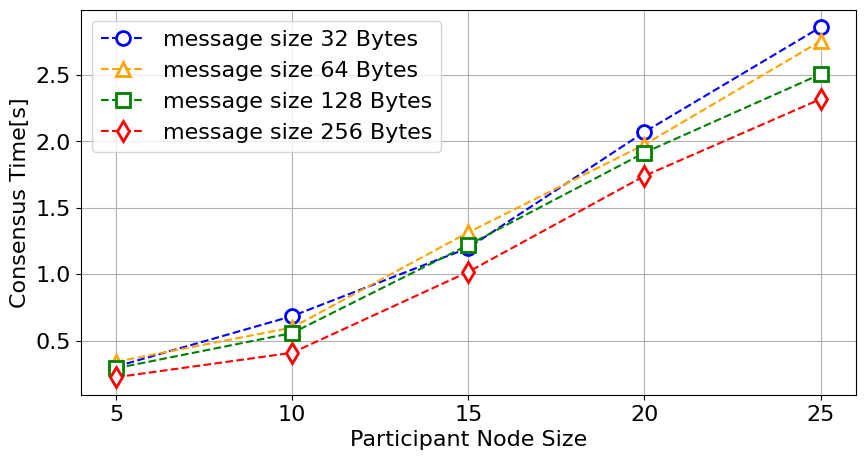

In [3]:
fixed_vehicle_num_list = [5, 10, 15, 20, 25]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size_list = [32, 64, 128, 256]
network_delay = 0
proposer_id = 1

start_time_2lists = []
consensus_mean_time_2lists = []


for message_size in message_size_list:
    consensus_mean_time_list = []
    for fixed_vehicle_num in fixed_vehicle_num_list:

        input_folder_path = "../../results/multi_rsu_congestion_fixed_vehicle_num/fixed_v"  + str(fixed_vehicle_num) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
        start_time_list, consensus_time_list = get_consensus_time(input_folder_path)

        consensus_mean_time_list.append(mean(consensus_time_list))
    
    consensus_mean_time_2lists.append(consensus_mean_time_list)

print(consensus_mean_time_2lists)

# 3つwo1つのgraphにまとめる
plt.figure(figsize=(10, 5))
plt.plot(fixed_vehicle_num_list, consensus_mean_time_2lists[0], c='blue', marker='o', markersize=10, markerfacecolor='white', markeredgewidth=2, linestyle='--', label='message size 32 Bytes')
plt.plot(fixed_vehicle_num_list, consensus_mean_time_2lists[1], c='orange', marker='^', markersize=10, markerfacecolor='white', markeredgewidth=2, linestyle='--', label='message size 64 Bytes')
plt.plot(fixed_vehicle_num_list, consensus_mean_time_2lists[2], c='green', marker='s', markersize=10, markerfacecolor='white', markeredgewidth=2, linestyle='--', label='message size 128 Bytes')
plt.plot(fixed_vehicle_num_list, consensus_mean_time_2lists[3], c='red', marker='d', markersize=10, markerfacecolor='white', markeredgewidth=2, linestyle='--', label='message size 256 Bytes')

plt.xlabel('Participant Node Size', fontsize=16)
plt.ylabel('Consensus Time[s]', fontsize=16)

plt.xticks(range(5, 26, 5),fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)
plt.legend(fontsize=16)
plt.show()

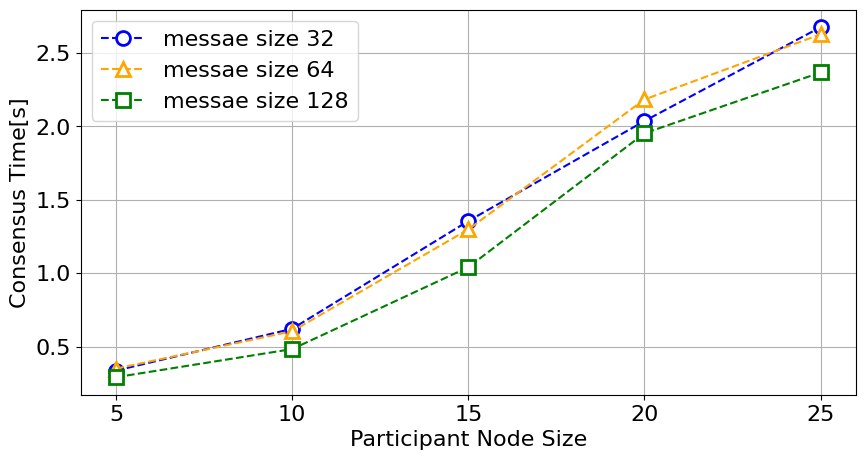

0.00863716814159292 0.07430088495575221 0.22175221238938053
0.013672064777327936 0.10834008097165992 0.5622955465587045
0.009798624754420433 0.1394548133595285 1.048303536345776
0.009477958236658934 0.21881438515081206 1.841792343387471
0.008703098106712565 0.2958657487091222 2.5544535283993115


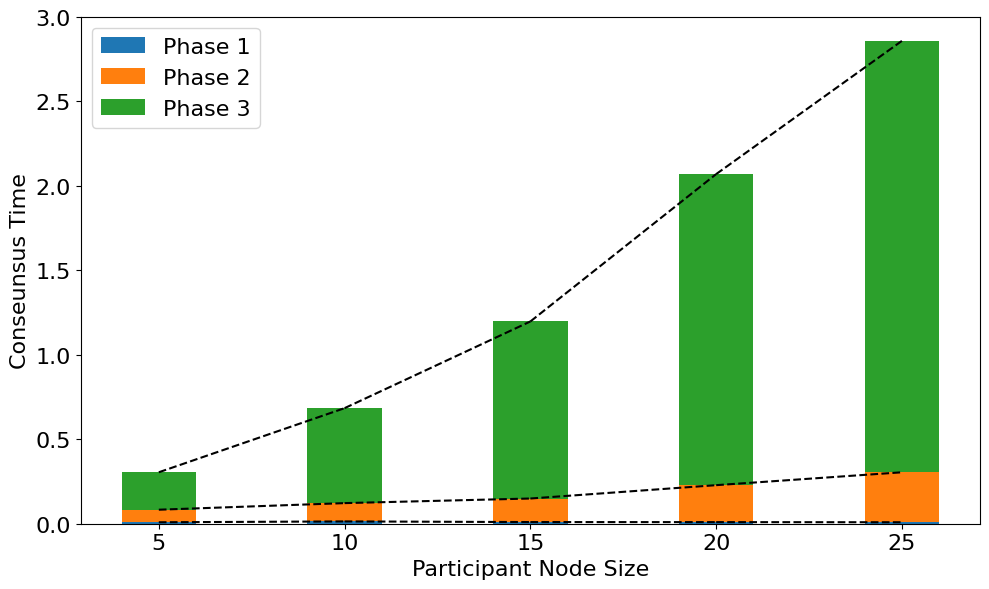

In [17]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np


def get_phase_time(input_folder_path):

    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    result = []
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []
    simulation_phase_1_time_list = []
    simulation_phase_2_time_list = []
    simulation_phase_3_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)

        simulation_phase_1_time_list.append((int(row["end_phase_a_pro_time"]) - int(row["start_time"])) / 1000)
        simulation_phase_2_time_list.append((int(row["end_phase_a_vali_time"]) - int(row["end_phase_a_pro_time"])) / 1000)
        simulation_phase_3_time_list.append((int(row["end_time"]) - int(row["end_phase_a_vali_time"])) / 1000)

    print(mean(simulation_phase_1_time_list), mean(simulation_phase_2_time_list), mean(simulation_phase_3_time_list))
    


    return mean(simulation_phase_1_time_list), mean(simulation_phase_2_time_list), mean(simulation_phase_3_time_list)



fixed_vehicle_num_list = [5, 10, 15, 20, 25]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id = 1

simulation_phase_1_time_list = []
simulation_phase_2_time_list = []
simulation_phase_3_time_list = []

for fixed_vehicle_num in fixed_vehicle_num_list:
    input_folder_path = "../../results/multi_rsu_congestion_fixed_vehicle_num/fixed_v"  + str(fixed_vehicle_num) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    simulation_phase_1_time, simulation_phase_2_time, simulation_phase_3_time = get_phase_time(input_folder_path)
    simulation_phase_1_time_list.append(simulation_phase_1_time)
    simulation_phase_2_time_list.append(simulation_phase_2_time)
    simulation_phase_3_time_list.append(simulation_phase_3_time)

    

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 2.0

# Convert lists to numpy arrays for stacking
phase_1 = np.array(simulation_phase_1_time_list)
phase_2 = np.array(simulation_phase_2_time_list)
phase_3 = np.array(simulation_phase_3_time_list)

# Plot each phase stacked on top of each other
ax.bar(fixed_vehicle_num_list, phase_1, bar_width, label='Phase 1')
ax.bar(fixed_vehicle_num_list, phase_2, bar_width, bottom=phase_1, label='Phase 2')
ax.bar(fixed_vehicle_num_list, phase_3, bar_width, bottom=phase_1 + phase_2, label='Phase 3')

# 各Phaseの上に点線を追加
for i in range(len(fixed_vehicle_num_list) - 1):
    x1, x2 = fixed_vehicle_num_list[i], fixed_vehicle_num_list[i+1]
    ax.plot([x1, x2], [phase_1[i], phase_1[i+1]], 'k--')  # Phase 1
    ax.plot([x1, x2], [phase_1[i] + phase_2[i], phase_1[i+1] + phase_2[i+1]], 'k--')  # Phase 2
    ax.plot([x1, x2], [phase_1[i] + phase_2[i] + phase_3[i], phase_1[i+1] + phase_2[i+1] + phase_3[i+1]], 'k--')  # Phase 3


# Add labels, legend, and title
ax.set_xlabel('Participant Node Size', fontsize=16)
ax.set_ylabel('Conseunsus Time', fontsize=16)
# ax.set_title('Simulation Phase Times by Fixed Vehicle Number', fontsize=16)
ax.set_xticks(fixed_vehicle_num_list)
ax.legend(fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show plot
plt.tight_layout()
plt.show()




CDF(Cumulative Distribution Function)のプロット

In [4]:
import numpy as np
from scipy.stats import norm

# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id_list = [0, 1, 2]

start_time_2lists_no_rl = []
consensus_time_2lists_no_rl = []
start_time_2lists_with_rl = []
consensus_time_2lists_with_rl = []

for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_congestion/vs"  + str(vehicle_speed) + "_" + str(min_vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    start_time_2lists_no_rl.append(start_time_list)
    consensus_time_2lists_no_rl.append(consensus_time_list)


for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_congestion_with_immu/vs"  + str(vehicle_speed) + "_" + str(min_vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    start_time_2lists_with_rl.append(start_time_list)
    consensus_time_2lists_with_rl.append(consensus_time_list)


# # データをソート
# sorted_data = np.sort(consensus_time_list)
# # 経験的なCDFの計算
# cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# # プロット
# plt.figure(figsize=(8, 5))
# plt.plot(sorted_data, cdf_values, marker='o', linestyle='-', color='b', label="Empirical CDF")


# plt.xlabel("Data values")
# plt.ylabel("CDF")
# plt.title("Cumulative Distribution Function (CDF)")
# plt.grid(True)
# plt.legend()
# plt.show()




# plt.figure(figsize=(10, 6))

# # consensus_time_2lists_no_rl のプロット
# for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
#     sorted_data = np.sort(consensus_time_list)
#     cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
#     plt.plot(sorted_data, cdf_values, linestyle='-', label=f"No RL Proposer {i}")

# # consensus_time_2lists_with_rl のプロット
# for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
#     sorted_data = np.sort(consensus_time_list)
#     cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
#     plt.plot(sorted_data, cdf_values, linestyle='--', label=f"With RL Proposer {i}")


# # グラフの詳細設定（フォントサイズの調整）
# plt.xlabel("Consensus Time", fontsize=14)
# plt.ylabel("CDF", fontsize=14)
# plt.title("Cumulative Distribution Function (CDF) for Consensus Times", fontsize=16)
# plt.xlim(0, 30)  # X軸の最大値を30に設定
# plt.grid(True)
# plt.legend(fontsize=12)
# plt.show()


# 色のリスト
colors = ['b', 'g', 'r']  # プロポーザごとに異なる色を設定

# CDFのプロット
plt.figure(figsize=(10, 6))
for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf_values, linestyle='--', color=colors[i], label=f"No RL CDF Proposer {i}")

for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf_values, linestyle='-', color=colors[i], label=f"With RL CDF Proposer {i}")

plt.xlabel("Consensus Time(s)", fontsize=14)
plt.ylabel("CDF", fontsize=14)
plt.title("CDF for Consensus Times", fontsize=20)
plt.xlim(0, 40)  # X軸の最大値を30に設定
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

# CCDFのプロット
plt.figure(figsize=(10, 6))
for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ccdf_values = 1 - cdf_values
    plt.plot(sorted_data, ccdf_values, linestyle='--', color=colors[i], label=f"No RL CCDF Proposer {i}")

for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ccdf_values = 1 - cdf_values
    plt.plot(sorted_data, ccdf_values, linestyle='-', color=colors[i], label=f"With RL CCDF Proposer {i}")

# 縦軸を対数スケールに設定
plt.yscale("log")

# グラフの詳細設定
plt.xlabel("Consensus Time(s)", fontsize=14)
plt.ylabel("CCDF", fontsize=14)
plt.title("CCDF for Consensus Times", fontsize=20)
plt.xlim(0, 40)  # X軸の最大値を30に設定
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # 対数スケールで両方の目盛り線を表示
plt.legend(fontsize=10)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../results/multi_rsu_congestion_with_immu/vs80_20/n253/m32/d0/0/consensus_folder.csv'